<h1 align="center"> Principle Component Analysis (PCA) </h1>

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Load Iris Dataset

In [5]:
# loading dataset into Pandas DataFrame
trans = pd.read_csv('expression_data.csv')
sample_info = pd.read_csv('sample_info.csv')

In [6]:
display(trans)

,Unnamed: 0,SPAC212.11,SPAC212.09c,SPAC212.04c,SPNCRNA.601,SPAC977.11,SPAC977.13c,SPAC977.15,SPAC977.16c,SPNCRNA.607,SPAC1F8.06
0,wt_0_r1,4.947329,5.443589,5.751174,5.731843,7.046601,5.335904,6.500652,7.237060,5.961123,6.640223
1,wt_0_r2,4.969572,6.205209,5.058125,4.868198,6.837324,5.339053,6.232901,7.457934,5.691651,6.651266
2,wt_0_r3,5.657995,6.172470,5.544557,4.936256,6.788719,5.310125,6.697946,7.475547,5.942602,6.777698
3,wt_15_r1,5.452545,5.943911,5.675589,5.569892,6.870560,5.319716,7.028231,7.088272,5.923746,4.616742
4,wt_15_r2,5.444799,6.333457,5.175381,5.319763,6.092104,5.988160,6.923664,7.461087,5.874517,5.607453
5,wt_15_r3,6.501252,6.405294,5.101433,4.198365,6.189225,5.295882,7.534349,7.646591,4.842055,6.149393
6,wt_30_r1,5.078831,6.711639,5.823344,5.168548,6.908198,7.606185,6.441425,6.878977,7.377979,5.655475
7,wt_30_r2,5.254861,7.146486,6.313480,4.772003,6.658501,7.483295,6.680045,7.131173,7.304704,6.497174
8,wt_30_r3,5.324121,6.932336,6.595747,5.078932,6.932336,7.142835,6.766412,7.632571,7.597660,6.441647
9,wt_60_r1,4.853563,6.790664,5.618074,5.399681,6.220495,5.742349,5.742349,6.535896,6.960366,6.655092


In [7]:
display(sample_info)

,sample,strain,minute,replicate
0,wt_0_r1,wt,0,r1
1,wt_0_r2,wt,0,r2
2,wt_0_r3,wt,0,r3
3,wt_15_r1,wt,15,r1
4,wt_15_r2,wt,15,r2
5,wt_15_r3,wt,15,r3
6,wt_30_r1,wt,30,r1
7,wt_30_r2,wt,30,r2
8,wt_30_r3,wt,30,r3
9,wt_60_r1,wt,60,r1


## Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it is necessary to standardize the data.

## PCA Projection to 2D

In [11]:
pca = PCA(n_components=5)

In [12]:
final_df = pca.fit_transform(trans.iloc[:,1:])
display(final_df)

array([[-0.68685159,  0.63661252,  0.75753278,  0.25784154,  0.25031513],
       [-0.85434218,  0.83750606, -0.30894353, -0.26832469,  0.58172741],
       [-0.53912381,  1.05242951,  0.01352382, -0.61307615,  0.06200167],
       [-0.15683632,  1.87748792,  0.2582776 ,  1.36373117, -0.50719161],
       [ 0.06471676,  1.71309209, -0.48125655,  0.44602216,  0.27873711],
       [-0.87123216,  2.5650565 , -0.71903357, -0.99145075, -0.5540689 ],
       [ 2.02807916,  0.20739336, -0.73816386,  0.69378866, -0.03081194],
       [ 2.06228767,  0.02375673, -0.58314974, -0.41798791, -0.03935267],
       [ 2.15103504,  0.24901477,  0.0629244 , -0.42369809,  0.08801169],
       [ 0.05960257, -0.47582227, -0.50743936,  0.33653313,  0.59901524],
       [ 0.92041744,  0.09723516, -0.49214295, -0.02442249,  0.52920112],
       [ 0.64424258,  0.22879919, -0.32144336, -0.18417962,  0.52376684],
       [-0.85251163, -0.85553542, -0.21392124,  0.37559209,  0.10915787],
       [-1.29220407, -1.19712335, -0.5

In [13]:
final_df = pd.DataFrame(data = final_df)

In [14]:
display(final_df)

,0,1,2,3,4
0,-0.686852,0.636613,0.757533,0.257842,0.250315
1,-0.854342,0.837506,-0.308944,-0.268325,0.581727
2,-0.539124,1.052430,0.013524,-0.613076,0.062002
3,-0.156836,1.877488,0.258278,1.363731,-0.507192
4,0.064717,1.713092,-0.481257,0.446022,0.278737
5,-0.871232,2.565057,-0.719034,-0.991451,-0.554069
6,2.028079,0.207393,-0.738164,0.693789,-0.030812
7,2.062288,0.023757,-0.583150,-0.417988,-0.039353
8,2.151035,0.249015,0.062924,-0.423698,0.088012
9,0.059603,-0.475822,-0.507439,0.336533,0.599015


In [15]:
final_df = pd.concat([final_df, y], axis = 1)
display(final_df)

NameError: name 'y' is not defined

## Visualize 2D Projection

Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other? 

KeyError: 'PCA 1'

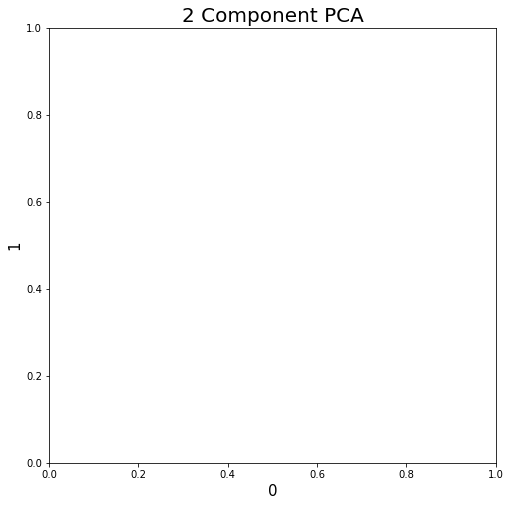

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('0', fontsize = 15)
ax.set_ylabel('1', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    ax.scatter(final_df.loc[:, 'PCA 1']
               , final_df.loc[:, 'PCA 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [18]:
pca.explained_variance_ratio_

array([0.38145399, 0.31307346, 0.07757565, 0.07291508, 0.04395679])

In [19]:
pca.explained_variance_ratio_.sum()

0.888974972555888

In [23]:
pca.singular_values_

array([6.15108865, 5.57255078, 2.77391803, 2.6893021 , 2.0880645 ])

The first two principal components explain 95.80% of the observed variance (72.77% of the variance the first component and the s 23.03% the second component). The rest pricipal components contained the rest of the variance of the dataset. In conclusion, we can affirm that our new variables high porcentage of the variance, so we can use these new variables to describe our data without lose important information

## Limitations 

- PCA is not scale invariant. check: we need to scale our data first. 
- The directions with largest variance are assumed to be of the most interest 
- Only considers orthogonal transformations (rotations) of the original variables 
- PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not. 
- If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances. 